In [1]:
# load useful libraries
library(data.table)
library(ggplot2)
library(qvalue)

In [2]:
# load rare variant results
saige_dir = "/directflow/SCCGGroupShare/projects/anncuo/OneK1K/saige_eqtl/from_wei/Feb24/"
myfile = paste0(saige_dir, "all_cis_rare_with_dTSS_weights.results.txt")
df = as.data.frame(fread(myfile))

In [3]:
head(df)

,celltype,Region,Group,min_MAF,max_MAF,Weight,Pvalue,Pvalue_ACATV,Pvalue_SKATO,Pvalue_Burden,Pvalue_SKAT,BETA_Burden,SE_Burden,MAC,Number_rare,Number_ultra_rare
,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,Plasma,A1BG,null,0,0.05,dTSS,0.8766689,0.6772141,NA,0.9442545,0.7618615,0.007958452,0.002500256,23392.80,561,1340
2,Plasma,A1BG,null,0,0.05,Beta_1_25,0.6739423,0.5819687,NA,0.4340790,0.8364173,-0.002087573,0.006287923,23904.00,561,1340
3,Plasma,A1BG,null,0,0.05,Equal_Weights,0.7201885,0.5936323,NA,0.5116708,0.8611497,-0.022259367,0.380390295,23904.00,561,1340
4,Plasma,A1BG,Cauchy,NA,NA,NA,0.7907711,0.6200851,NA,0.8405194,0.8278134,NA,NA,NA,NA,NA
5,Plasma,AAAS,null,0,0.05,dTSS,0.6182132,0.7822394,NA,0.3631167,0.6213246,0.183845477,0.262531214,60774.94,1300,2874
6,Plasma,AAAS,null,0,0.05,Beta_1_25,0.6642145,0.8399541,NA,0.2850562,0.6909263,0.003461475,0.003047685,61285.00,1300,2874


In [4]:
# extract unique cell types
celltypes = unique(df$celltype)
length(celltypes)

[1] 14

In [5]:
# extract Cauchy results per gene
df_to_plot = data.frame()
for (celltype in celltypes){
    df0 = df[df$celltype == celltype & df$Group == "Cauchy",]
    df0 <- df0[rowSums(is.na(df0)) != ncol(df0), ]
    df0$qv = qvalue(df0$Pvalue)$qvalues
    new_df = data.frame(celltype = celltype,
                       n_cauchy = nrow(df0[df0$qv < 0.05,]))
    df_to_plot = rbind(df_to_plot, new_df)
}
head(df_to_plot,2)

,celltype,n_cauchy
,<chr>,<int>
1,Plasma,16
2,NK,832


In [11]:
# specify OneK1K cell type colours
df_to_plot$celltype <- factor(df_to_plot$celltype, 
                                    levels = c("CD4_NC","CD4_ET","CD4_SOX4","CD8_ET","CD8_NC","CD8_S100B","NK",
                                               "NK_R","Plasma","B_Mem","B_IN","Mono_C","Mono_NC","DC"))

df_colours = data.frame(colours = c("#882E72","#B178A6","#D6C1DE","#1965B0","#5289C7","#7BAFDE","#4EB265",
                                    "#90C987","#CAE0AB","#F7EE55","#F6C141","#F1932D","#E8601C","#DC050C"),
                        celltype = c("CD4_NC","CD4_ET","CD4_SOX4","CD8_ET","CD8_NC","CD8_S100B","NK","NK_R",
                                     "Plasma","B_Mem","B_IN","Mono_C","Mono_NC","DC"))
head(df_colours)

,colours,celltype
,<chr>,<chr>
1,#882E72,CD4_NC
2,#B178A6,CD4_ET
3,#D6C1DE,CD4_SOX4
4,#1965B0,CD8_ET
5,#5289C7,CD8_NC
6,#7BAFDE,CD8_S100B


In [23]:
my_lab <- c(expression(CD4['NC']),
            expression(CD4['ET']), 
            expression(CD4['SOX4']),
            expression(CD8['ET']),
            expression(CD8['NC']),
            expression(CD8['S100B']),
            expression('NK'),
            expression(NK['R']),
            expression('Plasma'),
            expression(B['Mem']),
            expression(B['IN']),
            expression(Mono['C']),
            expression(Mono['NC']),
            expression('DC')
)

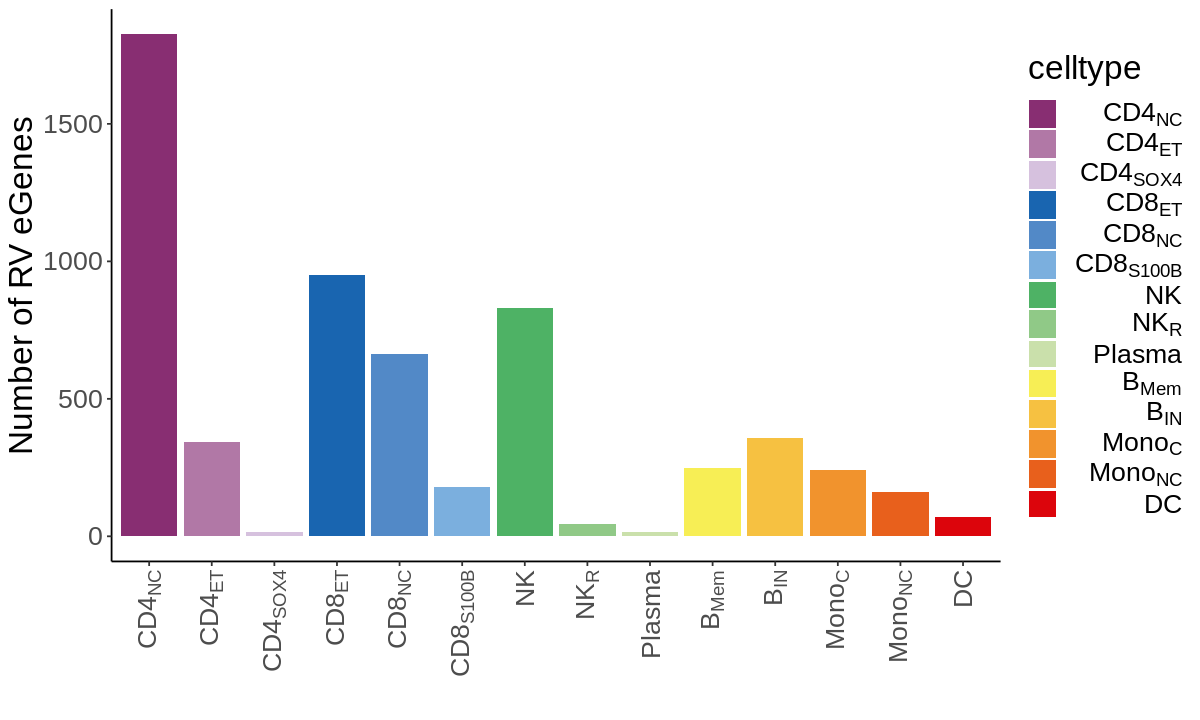

In [33]:
# plot
options(repr.plot.width = 10, repr.plot.height = 6)
p = ggplot(df_to_plot, aes(x=celltype, y=n_cauchy, fill=celltype)) + geom_bar(stat = "identity")
p = p + scale_fill_manual(values = df_colours$colours, labels = c(my_lab[1], 
                             my_lab[2],
                             my_lab[3],
                             my_lab[4], 
                             my_lab[5],
                             my_lab[6],
                             my_lab[7], 
                             my_lab[8],
                             my_lab[9],
                             my_lab[10], 
                             my_lab[11],
                             my_lab[12],
                             my_lab[13], 
                             my_lab[14])) 
p = p + scale_x_discrete(labels = c(my_lab[1], 
                             my_lab[2],
                             my_lab[3],
                             my_lab[4], 
                             my_lab[5],
                             my_lab[6],
                             my_lab[7], 
                             my_lab[8],
                             my_lab[9],
                             my_lab[10], 
                             my_lab[11],
                             my_lab[12],
                             my_lab[13], 
                             my_lab[14]))
p = p + theme_classic()
p = p + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
p = p + ylab("Number of RV eGenes") + xlab("") 
p = p + theme(text = element_text(size=20))
p 

In [30]:
# save
fig_dir <- "/directflow/SCCGGroupShare/projects/anncuo/OneK1K/saige_eqtl/ms_figures/"
pdf(paste0(fig_dir,"RV_eGenes_Cauchy_underscores.pdf"), width=10, height=6)
p
dev.off()

png 
  2